In [1]:
import numpy as np 
v = np.array([1,1])
print(v)

[1 1]


In [2]:
m=np.array([[2,3],[3,8]])
print(m[1,1])

8


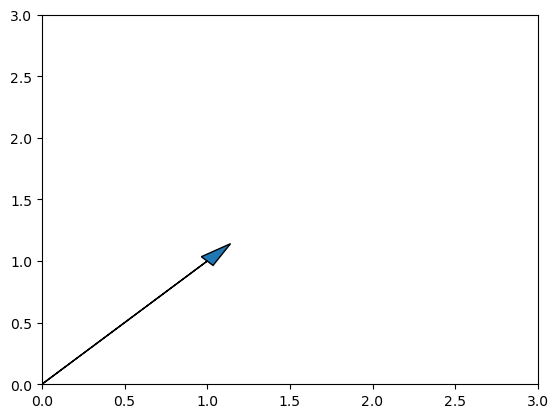

In [3]:
import matplotlib.pyplot as plt
plt.xlim(0,3)
plt.ylim(0,3)

plt.arrow(0,0,v[0],v[1],head_width=.1,head_length=.2,)


In [4]:
np.sqrt(np.sum(v**2))

1.4142135623730951

In [5]:
v= np.array([1,1,2])
print(v)

[1 1 2]


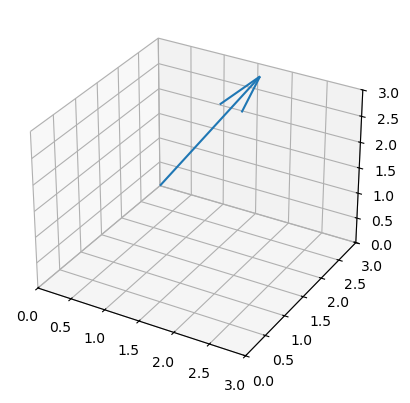

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.set_xlim([0,3])
ax.set_ylim([0,3])
ax.set_zlim([0,3])

ax.quiver(0,3,0, v[0],v[1],v[2],length=1)

In [7]:
v = np.array([1,1])*.5
v

array([0.5, 0.5])

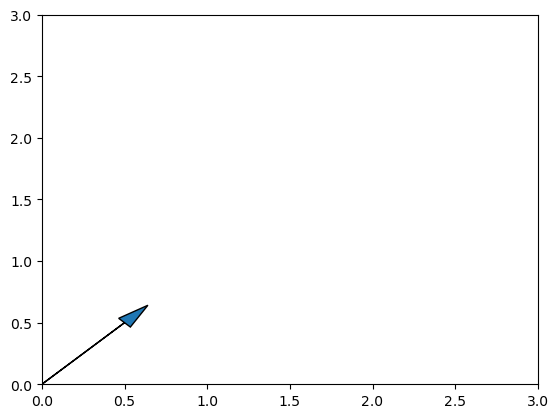

In [8]:
plt.xlim(0,3)
plt.ylim(0,3)

plt.arrow(0,0,v[0],v[1],head_width=.1,head_length=.2)

In [9]:
v = np.array([1,2])+np.array([1,0])
v

array([2, 2])

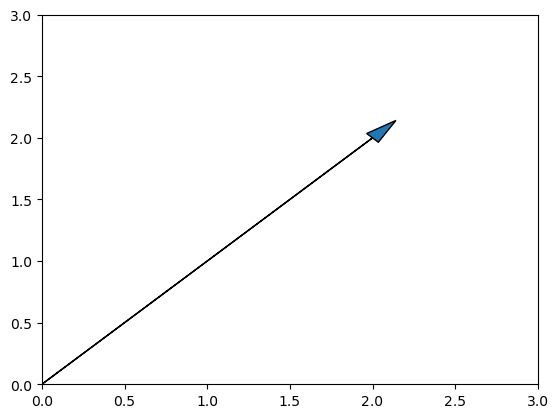

In [10]:
plt.xlim(0,3)
plt.ylim(0,3)
plt.arrow(0,0,v[0],v[1],head_length=.2,head_width=.1)

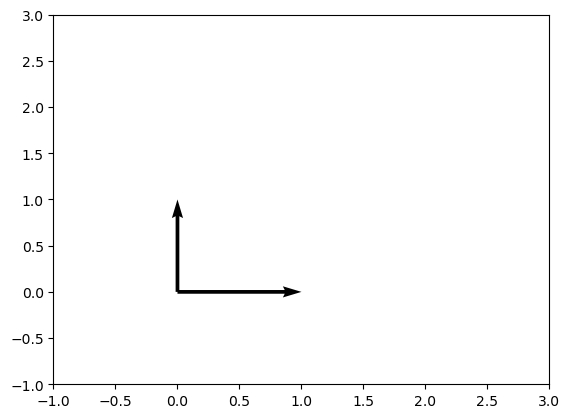

In [11]:
v1=np.array([0,1])
v2=np.array([1,0])

plt.xlim(-1,3)
plt.ylim(-1,3)

plt.quiver([0,0],[0,0],[v1[0],v2[0]],[v1[1],v2[1]],angles='xy',scale_units='xy',scale=1)

In [12]:
M = np.array([[1,2,3],[1,0,3],[2,1,0]])
M

array([[1, 2, 3],
       [1, 0, 3],
       [2, 1, 0]])

In [13]:
M.shape

(3, 3)

In [14]:
M[0]

array([1, 2, 3])

In [15]:
M[:,0]

array([1, 1, 2])

In [16]:
M[:2,:2]

array([[1, 2],
       [1, 0]])

In [17]:
M[0,0]=3

In [18]:
M

array([[3, 2, 3],
       [1, 0, 3],
       [2, 1, 0]])

In [19]:
### linear regression

$\hat{y}=wx+b$

In [20]:
import pandas as pd
data = pd.read_csv('dataset/clean_weather.csv')
data = data.ffill()
data.head(5)

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0


$$\hat{y}=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+b$$

In [21]:
w1=.7
w2=.3
w3=.1
b=10
w1*60+w2*35+w3*0+10

62.5

In [22]:
w=np.array([.7,.3,.1])
x=np.array([60,35,0])

np.dot(w,x)+b

62.5

$$
\begin{equation}
    A \times B = 
    \begin{bmatrix}
        a_{11} & a_{12} \\
        a_{21} & a_{22}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_{11} \\
    b_{21}
    \end{bmatrix}
    =
    \begin{bmatrix}
    a_{11}b_{11} + a_{12}b_{21} \\
    a_{21}b_{11} + a_{22}b_{21}
    \end{bmatrix}
\end{equation}
$$

In [23]:
X = data[['tmax','tmin','rain']].iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [24]:
X.shape


(3, 3)

In [25]:
w.shape

(3,)

In [26]:
W = w.reshape(3,1)

In [27]:
W.shape

(3, 1)

In [28]:
b = np.array([10])

X @ W+b

array([[62.5],
       [58.1],
       [56.9]])

In [29]:
W.T @X.T +b

array([[62.5, 58.1, 56.9]])

In [30]:
np.allclose((W.T @ X.T).T,X @ W)



True

### matrix inversion

In [31]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [34]:
# np.linalg.inv(X) 


In [35]:
np.linalg.inv(X+.1*np.eye(3))

array([[ 0.07378611, -0.06604895,  0.        ],
       [-0.09812987,  0.11341549,  0.        ],
       [-4.02332472, -5.34996509, 10.        ]])

In [36]:
X+.1*np.eye(3)

array([[60.1, 35. ,  0. ],
       [52. , 39.1,  0. ],
       [52. , 35. ,  0.1]])

In [42]:
ridge = X + .1 * np.eye(3)
inverse =np.linalg.inv(X+.1*np.eye(3)) 
ridge @inverse

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.44089210e-16,  1.00000000e+00,  0.00000000e+00],
       [ 6.88208797e-16, -1.18516114e-16,  1.00000000e+00]])

In [43]:
np.allclose(ridge@inverse, np.eye(3))

True

In [55]:
Y = data[["tmax_tomorrow"]].iloc[:3].to_numpy()
W =np.linalg.inv(X.T @ X + 0.1 * np.eye(x.shape[0]))@ X.T @ Y
W

array([[0.38283829],
       [0.86270249],
       [0.        ]])

In [56]:
X@W


array([[53.16488447],
       [53.55298814],
       [50.10217817]])

In [57]:
Y

array([[52.],
       [52.],
       [53.]])

In [59]:
np.array([10])
X@W + b



array([[63.16488447],
       [63.55298814],
       [60.10217817]])

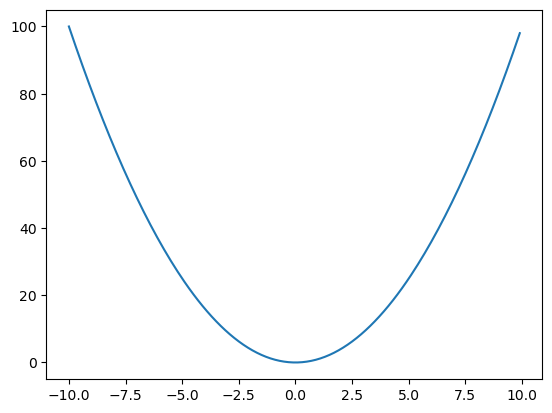

In [61]:
xs =np.arange(-10,10,.1)
ys =xs **2
plt.plot(xs,ys)